In [1]:
from pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
result = read_mat('./ex3data1.mat')
X = np.array(result['X'])
y = np.array(result['y'])

In [3]:
y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=uint8)

In [4]:
X.shape, y.shape

((5000, 400), (5000,))

In [5]:
def print_digit(digit_data):
    plt.imshow(digit_data.reshape(20, 20).T)

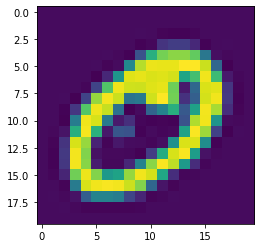

In [6]:
print_digit(X[499])

In [7]:
labels_ = np.unique(y)
labels_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [8]:
training_set_targets = np.zeros(y.shape)
training_set_targets[0 * 500:0 * 500 + 500] += 1
np.sum(training_set_targets)

500.0

In [9]:
models_set = []
for label_ in labels_:
    shift_index = (label_-1) * 500
    training_set_targets = np.zeros(y.shape)
    training_set_targets[shift_index:shift_index + 500] += 1
    model = LogisticRegression(max_iter=1000, penalty='l2')
    model.fit(X, training_set_targets)
    models_set.append(model)
models_set

[LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000)]

In [17]:
y = [val if val != 10 else 0 for val in y]
print(y[:10])
training_set_len = X.shape[0]
incorrect_predictions = 0
for digit_idx, digit in enumerate(X):
    predictions = [clf.predict_proba([digit])[0][1] for clf in models_set]
    predicted_digit = np.argmax(predictions)
    if predicted_digit != y[digit_idx]:
        incorrect_predictions += 1


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
# You should see that the training set accuracy is about 94.9%
accuracy = (training_set_len - incorrect_predictions) / training_set_len * 100
print(f'accuracy of logistic regression one vs all: {accuracy}%')

accuracy of logistic regression one vs all: 94.46%
